# Project 5: Machine Learning Modelling to Predict Deaths Associated with COVID-19

## Summary & Outlook:


We found that the COVID-19 data is indeed important to predict a good score. we have build a regression model to predict the number of deaths caused by COVID-19 over a six-month timeframe. We have identified the variables that contribute the most predictive capabilities in determining COVID-19 deaths. We have used R-squared and RMSE to evaluate our production model.

<br>
**Future Outlook**
<br>
In order to achieve more reliable data-driven predictions, we will focus on the following in the future: multivariate time series analysis that incorporates the important variables identified in the regression model.

### Part 4: Future Steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import os
import glob

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

In [2]:
# importing texas covid-19 data into a dataframe
df_texas = pd.read_csv('../data/texas_csv.csv',
                 na_values=[''], keep_default_na=False)

In [4]:
# convert columns to lowercase
df_texas.columns = [column.lower() for column in df_texas.columns]

# show dataframe
df_texas.head()

,province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate,total_test_results,case_fatality_ratio
0,Texas,US,2020-07-06 04:34:10,31.0545,-97.5635,196377,2817,100843.0,91461.0,48.0,672.274797,2133457.0,NaN,1.348162,84000048.0,USA,7357.793336,NaN,NaN,NaN
1,Texas,US,2020-07-05 04:34:00,31.0545,-97.5635,192796,2784,97430.0,92116.0,48.0,662.690677,2071809.0,NaN,1.356731,84000048.0,USA,7145.183828,NaN,NaN,NaN
2,Texas,US,2020-07-31 04:35:31,31.0545,-97.5635,429579,6839,260542.0,161245.0,48.0,1476.861489,3609474.0,NaN,1.504335,84000048.0,USA,12448.230147,NaN,NaN,NaN
3,Texas,US,2020-07-13 04:43:16,31.0545,-97.5635,263551,3432,132638.0,126908.0,48.0,906.204574,2492754.0,NaN,1.223921,84000048.0,USA,8596.924508,NaN,NaN,NaN
4,Texas,US,2020-07-14 04:34:58,31.0545,-97.5635,270707,3505,136419.0,130083.0,48.0,930.401115,2540125.0,NaN,1.214332,84000048.0,USA,8760.295988,NaN,NaN,NaN


In [5]:
# changing date to datetime
df_texas['date'] = pd.to_datetime(df_texas['last_update'])

In [6]:
# setting the date as the ind
df_texas.set_index('date', inplace=True)
df_texas.sort_index(inplace=True)

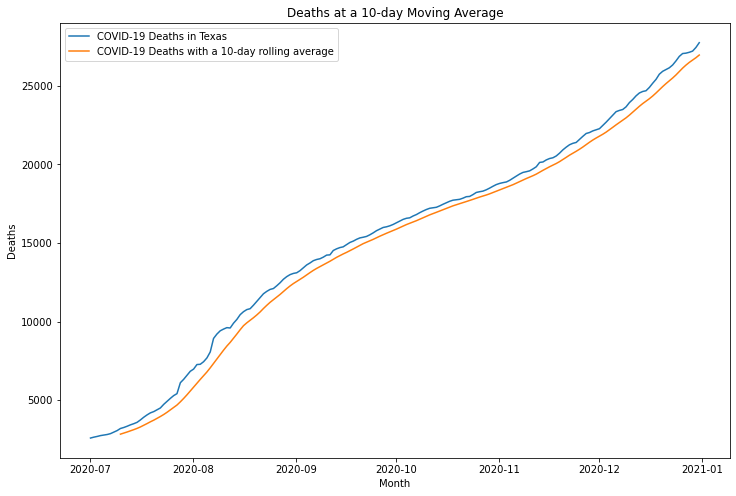

In [7]:
# plotting deaths and deaths with a rolling mean of 10
plt.figure(figsize=(12,8))
plt.plot(df_texas['deaths'], label = 'COVID-19 Deaths in Texas')
plt.plot(df_texas['deaths'].rolling(10).mean(), label = 'COVID-19 Deaths with a 10-day rolling average')
plt.legend()
plt.ylabel('Deaths')
plt.xlabel('Month')
plt.title('Deaths at a 10-day Moving Average');

Here we have visualized deaths, as well as deaths with a rolling mean of 10 days.
The rolling mean helps us visualize deaths without the deaths being as susceptible to spikes in the data or lags in data reporting.
Visualizing death as a function of time is the first step in time series modeling. From here, we want to try out several different time series forecasting techniques, but time did not permit us to do this.